# Exploratory Data Analysis
This notebook aims to study the data on a deeper level for the following reasons:

Currently, we are averaging speed across **ALL vehicles** by **hour**. 
Census regions are broad - contain multiple routes and vehicle types that drive through over a given month. 

The data is the time series speed data of **all vehicle types** belonging to a specific **region** for a given month
- Do speeds vary significantly by vehicle type?
    - We see that certain vehicles have consistent speed readings over the duration of the month - drive through only once? 
- What do the 0 readings mean?  S(i.e., vehicle pausing, parking, etc) 
- What is the **rule** for recording speeds? (Change in speed? distance? time?) - some vehicles only appear once in a months span for a region 
- The time of recording is inconsistent. No real pattern as time jumps from minute, 2 min, to hour. 

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import networkx as nx
import os
import re
import sys

In [2]:
input_dir = '../../raw_data/'

data_files = os.listdir(input_dir)
for i, j in enumerate(data_files):
    print(i, j)        

0 Speed Limits.zip
1 .DS_Store
2 google_transit.zip
3 streets.json
4 speed_limits
5 revenue_equipment_list.csv
6 google_transit
7 tweets
8 sf_speed_data
9 TransportationTerminology.pdf
10 speed_limit_sf.json
11 census_zones


### Load data

In [3]:
# Load vehicle types
vehicle_types = pd.read_csv(input_dir + data_files[5], usecols=[0,1])
print("Size of df: {}".format(vehicle_types.shape))
print("Number of unqiue v-types: {}".format(vehicle_types["EQUIP_NAME"].nunique()))
vehicle_types.head()

Size of df: (1689, 2)
Number of unqiue v-types: 65


EQUIP_CODE         EQUIP_NAME
0  4658                                   40' FLYER COACH
1  4662                                   40' FLYER COACH
2  7053                                 ARTICULATED FLYER
3  1548                                        LRV3-MOD11
4  17                                   POWELL STREET CAR

In [4]:
input_dir = '../../temp_data/region_data/'
print('Number of region files: {}'.format(len(os.listdir(input_dir))))
files = os.listdir(input_dir)

Number of region files: 196


### Distribution of Vehicle Speed by Vehicle type for ALL 1-month data

In [22]:
main_df = pd.read_csv(input_dir + files[0], usecols=['SPEED', 'VEHICLE_TAG'], dtype={'SPEED': np.float,
                                                                                     'VEHICLE_TAG': str})

for i in files[1:]:
    sample_df = pd.read_csv(input_dir + i, usecols=['SPEED', 'VEHICLE_TAG'], dtype={'SPEED': np.float,
                                                                                    'VEHICLE_TAG': str})
    main_df = pd.concat([main_df, sample_df], ignore_index=True)

In [23]:
print("Dimensions: {}".format(main_df.shape))

Dimensions: (33350866, 2)


In [24]:
main_df_vehicle_type = main_df.join(how='left', lsuffix='VEHICLE_TAG', rsuffix='EQUIP_CODE', other=vehicle_types)
print("Size of df: {}".format(main_df_vehicle_type.shape))
main_df_vehicle_type.head()

Size of df: (33350866, 4)


VEHICLE_TAG   SPEED                           EQUIP_CODE         EQUIP_NAME
0        5486   0.000  4658                                   40' FLYER COACH
1        5486   0.000  4662                                   40' FLYER COACH
2        5486   3.056  7053                                 ARTICULATED FLYER
3        5494  10.556  1548                                        LRV3-MOD11
4        5494  10.278  17                                   POWELL STREET CAR

In [25]:
# 6075047801 - index 0
plt.figure(1)
g = sns.FacetGrid(main_df_vehicle_type, col="EQUIP_NAME", col_wrap=5, sharey=False, sharex=False)
g = g.map(plt.hist, "SPEED")
g.savefig('../../output/all_region_speed_by_vehicle_type.png')

<Figure size 432x288 with 0 Axes>

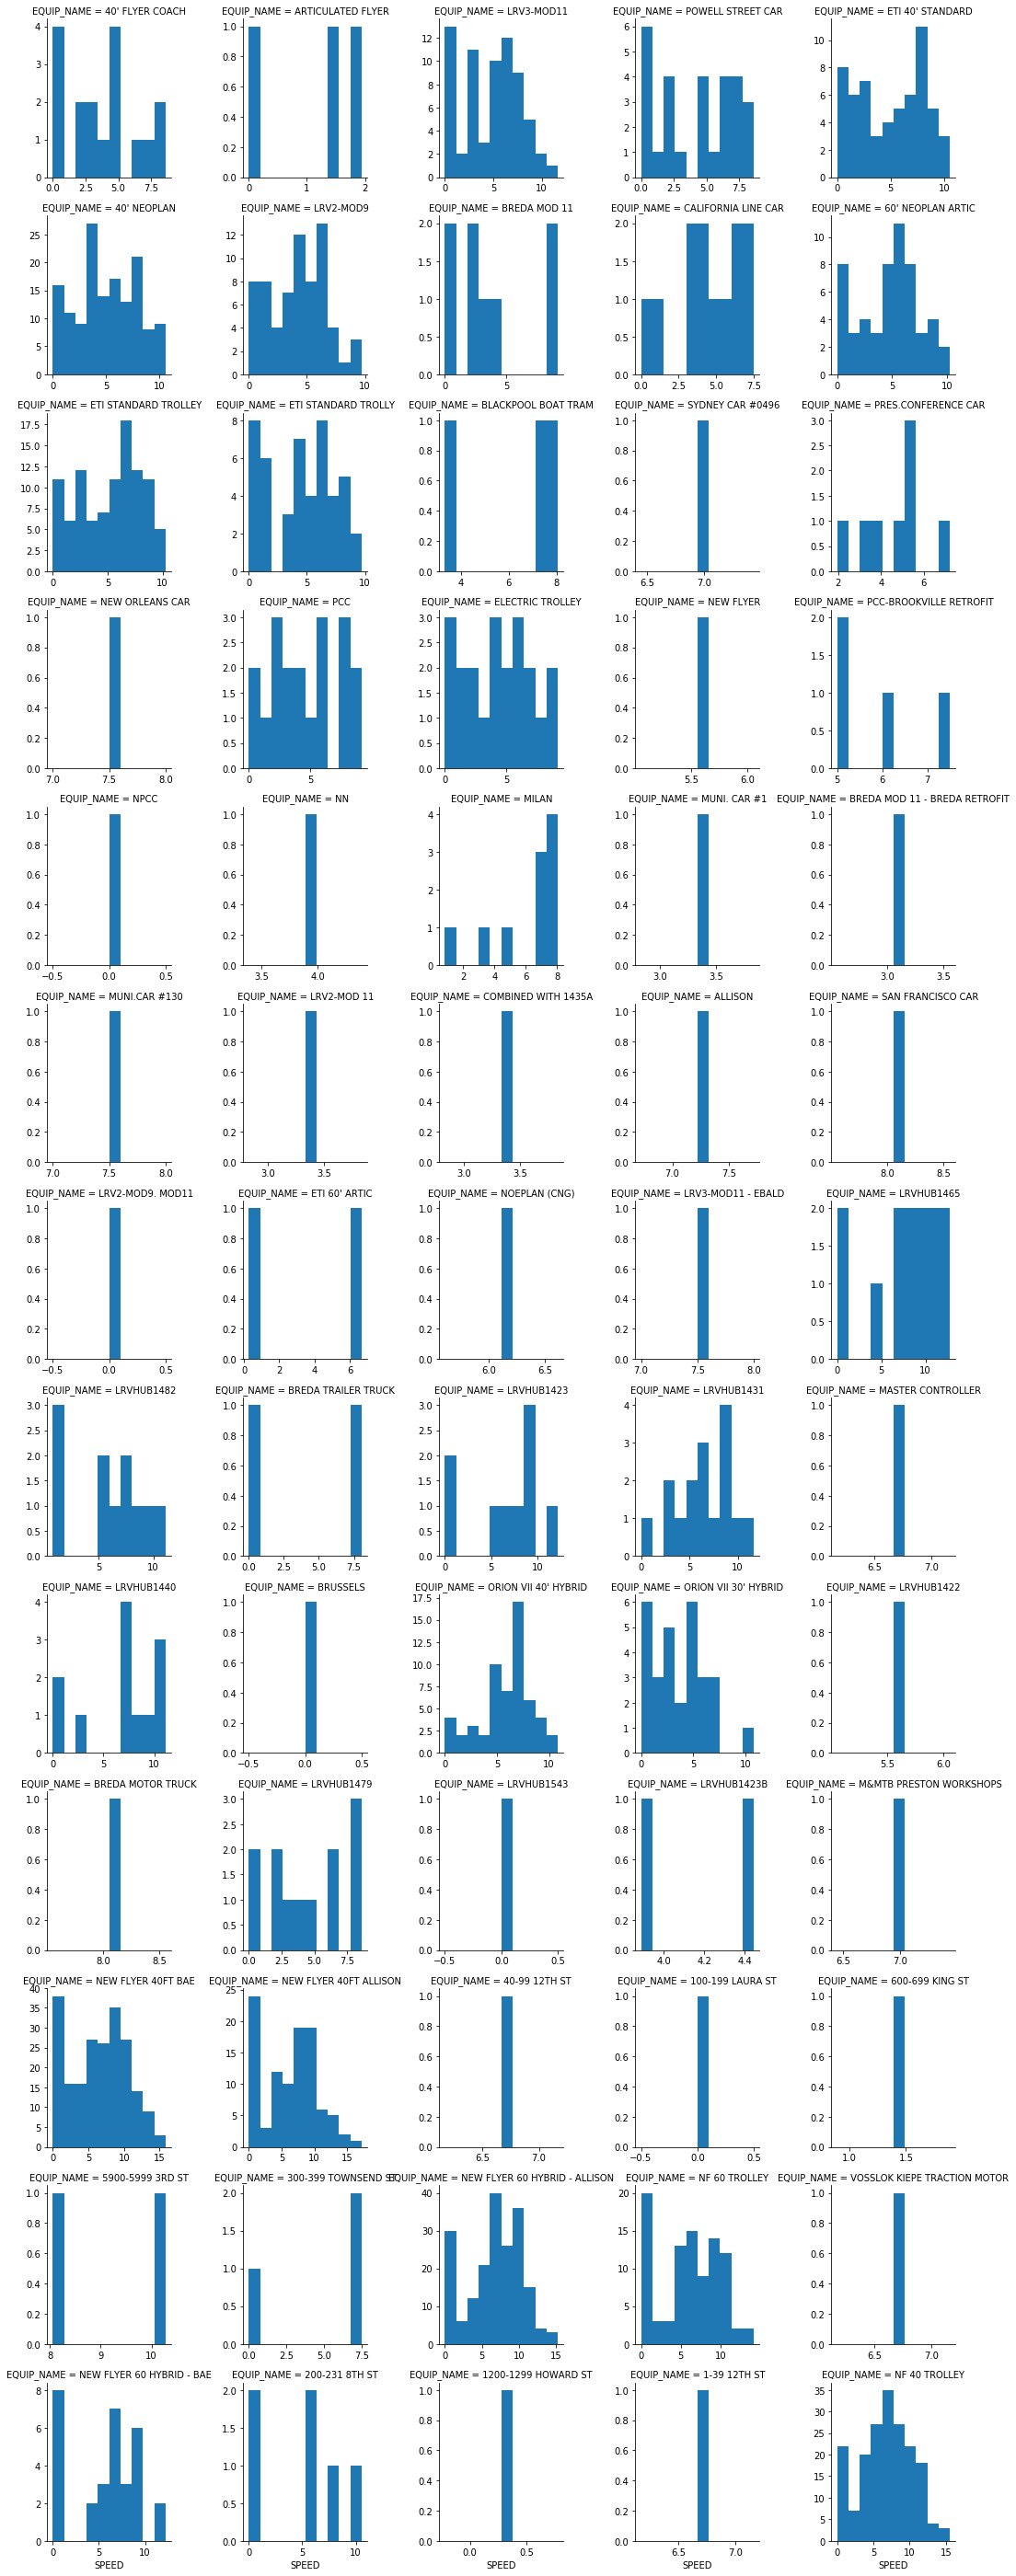

In [129]:
# 6075012800 - index 1 
g2 = sns.FacetGrid(sample_df_vehicle_type, col="EQUIP_NAME", col_wrap=5, sharey=False, sharex=False)
g2 = g2.map(plt.hist, "SPEED")
g2.savefig('../../output/region6075012800.png')

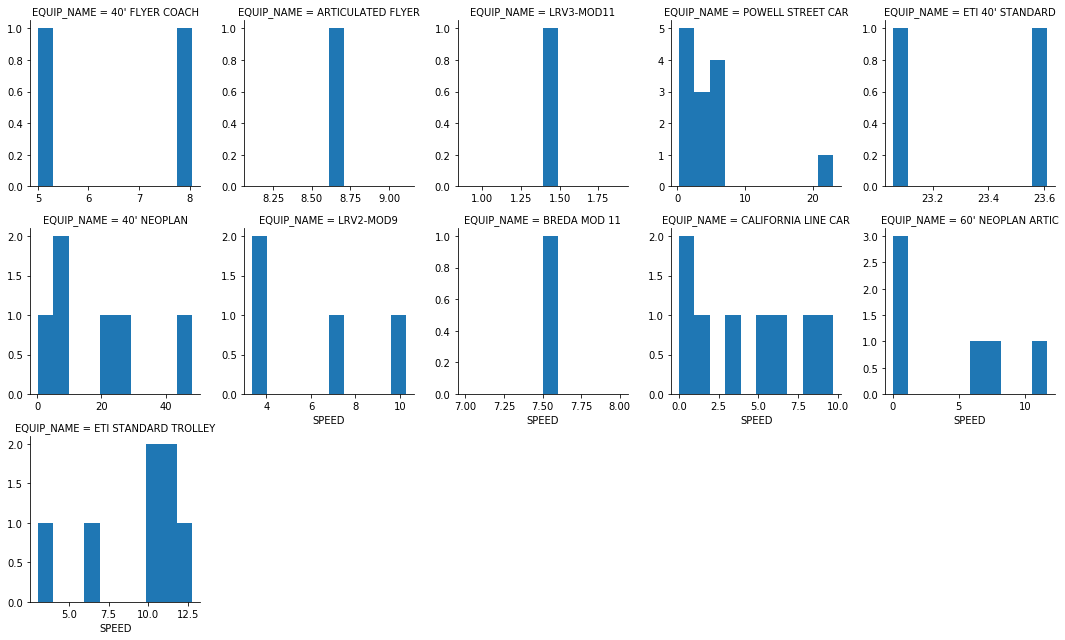

In [123]:
# # 6075990100 - index 34
# g3 = sns.FacetGrid(sample_df_vehicle_type, col="EQUIP_NAME", col_wrap=5, sharey=False, sharex=False)
# g3 = g3.map(plt.hist, "SPEED")
# g3.savefig('../../output/region6075990100.png')

In [27]:
sample_df_vehicle_type[sample_df_vehicle_type["EQUIP_NAME"] == "VOSSLOK KIEPE TRACTION MOTOR"]

REV          REPORT_TIME VEHICLE_TAG  LONGITUDE  LATITUDE   SPEED  \
1058  1513  2016-02-01 13:53:49        8419 -122.49309  37.77663  12.222   

                         geometry  index_right     geoid10  \
1058  POINT (-122.49309 37.77663)           53  6075047801   

                               EQUIP_CODE                    EQUIP_NAME  
1058  TM100779094                          VOSSLOK KIEPE TRACTION MOTOR